Load a set of dependencies

In [1]:
import pandas as pd

Read in the transformed data CSV

In [2]:
data = pd.read_csv('../../../../data/metrics/events/master/all.csv', parse_dates=['start_date', 'end_date'])

Clean it up a bit

In [3]:
data = data[data.project_type != 'CLE']

Output the raw data

In [4]:
data

,project_name,event_name,event_type,season,start_date,airtable_id,actual_audience_size_number_of_participants_in_person,event_unique_identifier,project_type,ward_(from_venue),postcode_(from_venue),end_date,number_of_booked_participants,actual_audience_size_number_of_participants_online
0,Waking the Artist,Leeds city college - Theatre Design and Produc...,['CLE - Creative Learning session'],['Season 1 - Awakening'],2023-02-22,905,11.0,Waking the Artist: Leeds city college - Theatr...,NaN,NaN,NaN,NaT,NaN,NaN
2,05 - The Barn,Braindance with Hyde Park Book Club,['Public Event - Performance'],['Season 2 - Playing'],2023-05-20,1160,316.0,05 - The Barn: Braindance with Hyde Park Book ...,Produce (Signature),['Headingley and Hyde Park'],['LS6 2UZ'],2023-05-20,NaN,NaN
4,Skills Development,Early Career Music Promoters CPWM gig - Elise,['Partner Programme - Event'],['Season 2 - Playing'],NaT,1348,NaN,Skills Development: Early Career Music Promote...,NaN,NaN,NaN,NaT,NaN,NaN
5,Harewood House,Gwen Stefani,['Public Event - Large Scale Outdoor Event'],['Season 2 - Playing'],2023-06-27,487,NaN,Harewood House: Gwen Stefani,Promote,['Harewood'],['LS17 9LG'],2023-06-27,NaN,NaN
6,05 - The Barn,Schools Day 1,['CLE - Community Engagement session'],['Season 2 - Playing'],2023-05-09,207,180.0,05 - The Barn: Schools Day 1,Produce (Signature),['Headingley and Hyde Park'],['LS6 2UZ'],2023-05-09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,12 - My LEEDS 2023,My LEEDS Summer: Hunslet and Riverside Festiva...,['Public Event - Performance'],['Season 2 - Playing'],2023-06-17,415,NaN,12 - My LEEDS 2023: My LEEDS Summer: Hunslet a...,Produce (Signature),['Hunslet and Riverside'],['LS10 2QT'],2023-06-17,NaN,NaN
1230,NaN,NaN,NaN,NaN,NaT,1153,NaN,:,NaN,NaN,NaN,NaT,NaN,NaN
1231,"Embassy of Netherlands, Meet Leeds Lab","Embassy of Netherlands, Meet Leeds Lab",['Partner Programme - Event'],['Season 1 - Awakening'],2023-01-16,305,NaN,"Embassy of Netherlands, Meet Leeds Lab: Embass...",Partner,NaN,NaN,2023-01-20,NaN,NaN
1233,09 - Smeaton300: Moon Palace East Leeds Observ...,Delivery of Skills Development programme,['CLE - Skills and Talent session'],"['Season 1 - Awakening', 'Season 2 - Playing']",2023-02-06,223,NaN,09 - Smeaton300: Moon Palace East Leeds Observ...,Produce (Signature),NaN,NaN,2023-05-29,NaN,NaN


Calculate the counts of each kind of event

In [5]:
event_count = data.groupby(['project_type'])[['event_unique_identifier']].count()
event_count = event_count.rename(
    columns = {
        'event_unique_identifier': 'event_count'      
    }
)

Plot a bar chart

,event_count
project_type,
Partner,99
Produce (Signature),425
Promote,58


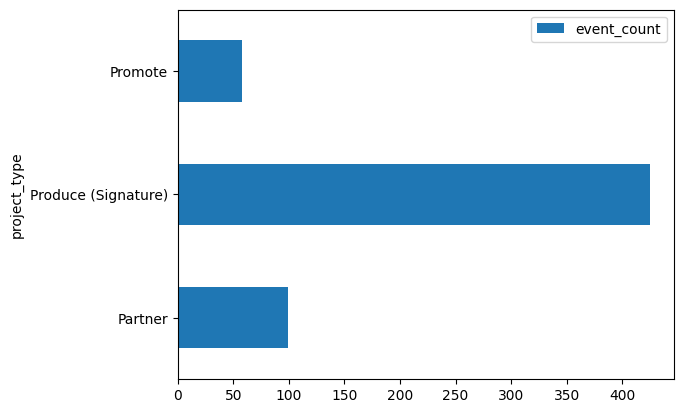

In [6]:
event_count.plot.barh()
event_count

In [7]:
partner = data.loc[
    data.project_type == 'Partner',
    [
        'start_date',
        'event_name',
        'actual_audience_size_number_of_participants_in_person',
        'actual_audience_size_number_of_participants_online',
        'ward_(from_venue)'
    ]
]

In [8]:
partner

,start_date,event_name,actual_audience_size_number_of_participants_in_person,actual_audience_size_number_of_participants_online,ward_(from_venue)
60,2023-07-27,"Gracefool Collective, Kick Off 2023",NaN,NaN,NaN
65,2023-05-24,"Watson Dance Projects, Corrine & Sharon Project",NaN,NaN,['Little London and Woodhouse']
69,2023-05-25,Matt Anderson Quartet,NaN,NaN,['Headingley and Hyde Park']
71,2023-06-17,"Keira Martin, Queenie and the Pooka (Workshops)",NaN,NaN,['Burmantofts and Richmond Hill']
74,2023-10-09,Light Night 2023 Installation,NaN,NaN,['Little London and Woodhouse']
...,...,...,...,...,...
1190,2022-10-13,"Light Night 2022, Illuminated Swim",NaN,NaN,['Bramley and Stanningley']
1202,2023-06-14,Leeds People’s Theatre Singing Workshop 1,NaN,NaN,['Beeston and Holbeck']
1209,2023-05-25,Shove It: The Xero Slingsby Story,NaN,NaN,['Chapel Allerton']
1215,2023-08-12,"Babeworld, No Home Advantage",NaN,NaN,['Little London and Woodhouse']


In [9]:
attendance = partner.groupby('start_date').sum(numeric_only=True)

In [10]:
attendance.resample('M').sum()

,actual_audience_size_number_of_participants_in_person,actual_audience_size_number_of_participants_online
start_date,,
2022-10-31,0.0,0.0
2022-11-30,220.0,0.0
2022-12-31,0.0,0.0
2023-01-31,0.0,0.0
2023-02-28,0.0,0.0
2023-03-31,0.0,0.0
2023-04-30,22.0,0.0
2023-05-31,0.0,0.0
2023-06-30,72.0,0.0


In [11]:
def project_data(data, name, type='Produce (Signature)'):
    return data.loc[(data.project_name == name) & (data.project_type == type)]

def summarise_project(filtered):
    result = pd.DataFrame({
        'events': filtered.groupby('start_date').event_name.count(),
        'attendances_in_person': filtered.groupby('start_date').actual_audience_size_number_of_participants_in_person.sum(),
        'attendances_online': filtered.groupby('start_date').actual_audience_size_number_of_participants_online.sum(),
    }).resample('W-FRI').sum().astype(int)
    result['cumulative_events'] = result.events.cumsum()
    result['cumulative_attendances_in_person'] = result.attendances_in_person.cumsum()
    result['cumulative_attendances_online'] = result.attendances_online.cumsum()

    return result

In [12]:
the_barn = data.pipe(project_data, name='05 - The Barn')

In [13]:
by_date = the_barn.pipe(summarise_project)
by_date

,events,attendances_in_person,attendances_online,cumulative_events,cumulative_attendances_in_person,cumulative_attendances_online
start_date,,,,,,
2022-10-21,1,0,0,1,0,0
2022-10-28,0,0,0,1,0,0
2022-11-04,0,0,0,1,0,0
2022-11-11,0,0,0,1,0,0
2022-11-18,0,0,0,1,0,0
2022-11-25,0,0,0,1,0,0
2022-12-02,0,0,0,1,0,0
2022-12-09,0,0,0,1,0,0
2022-12-16,0,0,0,1,0,0


In [14]:
import ast

def literal_converter(series):
    def convert(value):
        try:
            return ast.literal_eval(value)
        except (SyntaxError, ValueError):
            return value
    return series.apply(convert)


In [15]:
the_barn['ward_(from_venue)'].pipe(literal_converter).explode().value_counts()

Headingley and Hyde Park       22
Hunslet and Riverside           9
Little London and Woodhouse     7
Killingbeck and Seacroft        3
Gipton and Harehills            1
Beeston and Holbeck             1
Name: ward_(from_venue), dtype: int64